## Not A Unit Test :D 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

try:
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
except ImportError:
    import sys
    import os
    module_path = os.path.abspath('..')
    sys.path.append(module_path)
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
    
np.set_printoptions(precision=5)

In [47]:
lincar = envs.LinearCar()
executer = tools.Rollout(lincar, max_it=100, abort=False)

#policy_par = lambda par: (lambda x: par[0] + par[1:].dot(x))
#policy_grad = lambda x, a: np.array([1.,x[0],x[1]]) / a

policy_par = lambda par: (lambda x: np.exp(par[0] - par[1:].dot(x)) - 1.5)
policy_grad = lambda x, a, par: np.array([1.,-x[0],-x[1]])*policy_par(par)(x)

policy = tools.Policy(policy_par,(3), gradient=policy_grad, sigma=0.1)
optimizer = srb.PolicyGradient(executer, lincar, estimator='gpomdp', max_it=10000, eps=0.00001,  
                       parameter_domain=np.array([0,5]), rate = 0.5)

In [48]:
policy.setParameter(np.array([1,1,1]))
trace, i, _ = executer.rollout(policy)
t = trace[10]
print(policy.log_grad(t[1],t[0]))

[-0.85663  0.46752  0.06375]


In [49]:
par, conv = optimizer.optimize(policy)

Start GPOMDP optimization:
Initial Parameters: [ 3.94742  2.93443  3.94539]
Run: 0  	Parameter: 	[ 3.94742  2.93443  3.94539]	Reward: -52.1395070519
		Gradient: 	[-0.19033  0.01343  0.00567]
Run: 100  	Parameter: 	[ 2.5762   3.01612  3.98346]	Reward: -34.4179607533
		Gradient: 	[ 0.01635 -0.00068 -0.0005 ]
		Average Time: 	0.16s/step
Run: 200  	Parameter: 	[ 2.61142  3.01856  3.97651]	Reward: -33.4066635183
		Gradient: 	[ 0.01261 -0.0006  -0.00045]
		Average Time: 	0.14s/step
Run: 300  	Parameter: 	[ 2.67589  3.01715  3.97131]	Reward: -33.200528572
		Gradient: 	[ -3.17025e-03   2.71843e-04  -2.78120e-05]
		Average Time: 	0.16s/step
Run: 400  	Parameter: 	[ 2.55061  3.02541  3.97122]	Reward: -35.0719946187
		Gradient: 	[ 0.08238 -0.00458 -0.00212]
		Average Time: 	0.13s/step
Run: 500  	Parameter: 	[ 2.67587  3.02072  3.96333]	Reward: -33.7434713945
		Gradient: 	[ -2.45999e-03   1.90073e-04  -4.29569e-05]
		Average Time: 	0.16s/step
Run: 600  	Parameter: 	[ 2.62226  3.02537  3.9625 ]	Rew

KeyboardInterrupt: 

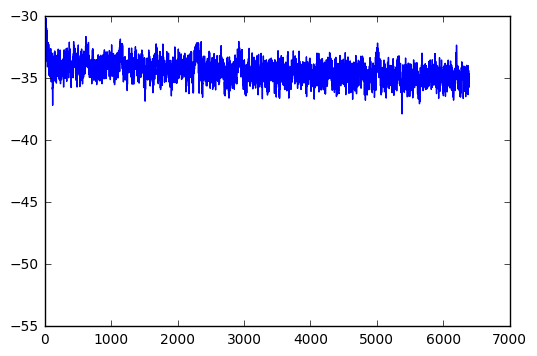

In [50]:
rewards = optimizer.rewards
plt.plot(np.arange(0,len(rewards)),rewards)
plt.show()

Best Parameter:	[ 2.95665  2.99513  3.97435]
Best Reward: 	-30.1857752931


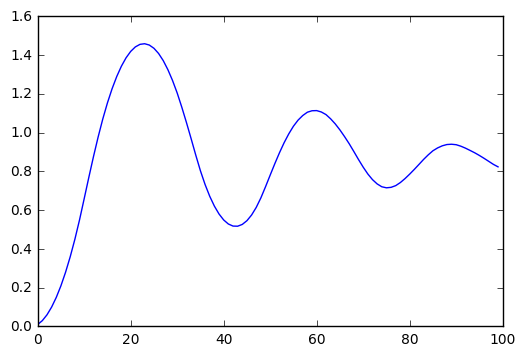

In [51]:
print("Best Parameter:\t"+str(optimizer.best_parameter))
print("Best Reward: \t"+str(optimizer.best_reward))

policy.setParameter(optimizer.best_parameter)
trace, i, achieved = executer.rollout(policy)

y = np.array([t[0] for t in [s[1] for s in trace]])
x = np.arange(0,i+1)

plt.plot(x,y)
plt.show()